Модели ARIMA и GARCH, прогнозирование значений на их основе

Преподаватель: Артур Сапрыкин, Наталья Баданина

Выберите ряд из первого задания и постройте его модель ARIMA/GARCH. Отчет нужно будет оформить в jupyter-ноутбук.

Дополнительное задание: попробуйте спрогнозировать график классическим ML.

Link to understand lection:
http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

In [9]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
import scipy.stats as scs

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


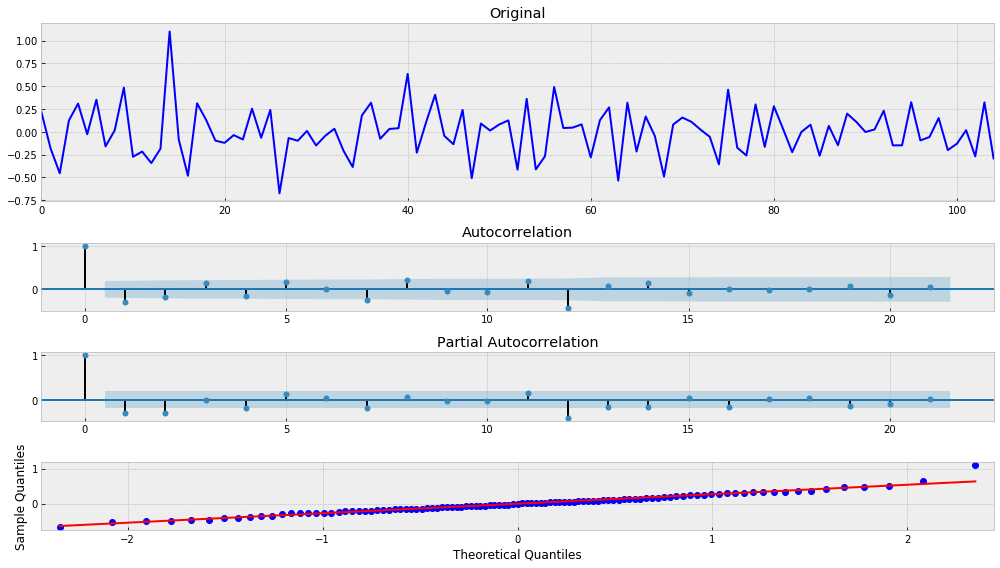

In [43]:
# Выберите ряд из первого задания
# airlines_passengers = pd.read_csv("../01/Series/international-airline-passengers.csv")['Count']
# company_sales = pd.read_csv("../01/Series/monthly-sales-of-company-x-jan-6.csv")['Count']
# car_sales = pd.read_csv("../01/Series/monthly-car-sales-in-quebec-1960.csv")['Count']
robberies = pd.read_csv("../01/Series/monthly-boston-armed-robberies-j.csv")['Count']
series = boxcox(robberies, 0)
series = series[12:] - series[:-12]
series = series[1:] - series[:-1]
tsplot(series)

In [44]:
series

array([ 0.21552486, -0.18286408, -0.45425527,  0.12550508,  0.31019991,
       -0.02645916,  0.35289422, -0.15950688,  0.01640604,  0.48530375,
       -0.27321004, -0.21594728, -0.34244515, -0.18539848,  1.10088244,
       -0.08534776, -0.4813855 ,  0.31349167,  0.12829006, -0.0956889 ,
       -0.12097322, -0.0356806 , -0.08365003,  0.2543933 , -0.06538276,
        0.24116206, -0.67377815, -0.06762742, -0.09759349,  0.01005034,
       -0.14948532, -0.04288657,  0.03408898, -0.20864853, -0.38566655,
        0.1797623 ,  0.32002245, -0.07569082,  0.03160534,  0.04030724,
        0.63573929, -0.22857494,  0.10074157,  0.4066765 , -0.043393  ,
       -0.13561412,  0.2407304 , -0.50753969,  0.09104049,  0.01458915,
        0.08097195,  0.12583164, -0.4148569 ,  0.36186437, -0.41235377,
       -0.26716162,  0.49200441,  0.04246691,  0.04576698,  0.08191712,
       -0.27972799,  0.12752473,  0.26881377, -0.53457579,  0.3202559 ,
       -0.21583923,  0.16828686, -0.04554644, -0.49063106,  0.07

In [45]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [46]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# постройте его модель ARIMA


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\tsatools.py:666: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\tsatools.py:666: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\tsatools.py:667: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-para

aic: 3.09721 | order: (4, 0, 2)
Results of Dickey-Fuller Test:
Test Statistic                -1.005351e+01
p-value                        1.392446e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.040000e+02
Critical Value (1%)           -3.494850e+00
Critical Value (5%)           -2.889758e+00
Critical Value (10%)          -2.581822e+00
dtype: float64


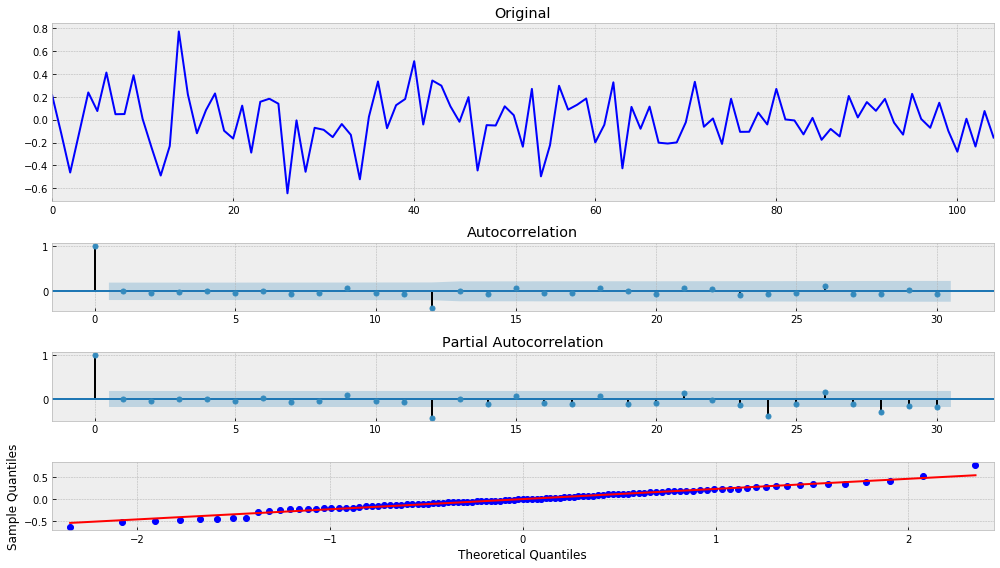

In [48]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
tsplot(best_mdl.resid, lags=30)

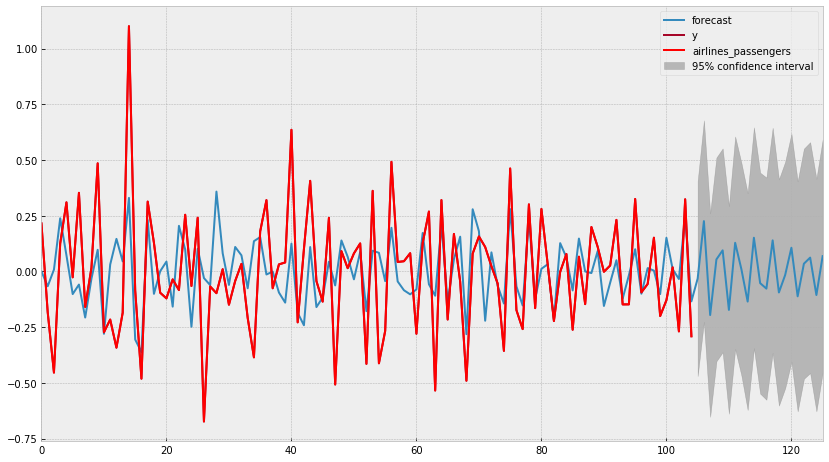

In [49]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    best_mdl.plot_predict(0, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='airlines_passengers')
    plt.legend()
    plt.show()

# Постройте модель GARCH

In [50]:
from arch import arch_model

In [51]:
am = arch_model(series)
res = am.fit(update_freq=5)
print(res.summary())

C:\Users\User\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07354. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      5,   Func. Count:     35,   Neg. LLF: 9.493092435540479
Iteration:     10,   Func. Count:     69,   Neg. LLF: 9.277918559159524
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.277918555334107
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -9.27792
Distribution:                  Normal   AIC:                           26.5558
Method:            Maximum Likelihood   BIC:                           37.1717
                                        No. Observations:                  105
Date:                Mon, May 18 2020   Df Residuals:                      101
Time:         